In [2]:
import json
import requests
import pandas as pd
import io
import ast
import numpy as np
import pyleoclim as pyleo
import seaborn as sns
import cfr

In [3]:
url = 'https://linkedearth.graphdb.mint.isi.edu/repositories/LiPDVerse-dynamic'

In [10]:
query1 = """PREFIX le: <http://linked.earth/ontology#>
PREFIX le_var: <http://linked.earth/ontology/variables#>
PREFIX wgs84: <http://www.w3.org/2003/01/geo/wgs84_pos#>


PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
SELECT DISTINCT ?dataSetName ?archiveType ?geo_meanLat ?geo_meanLon ?geo_meanElev 
    ?paleoData_variableName ?paleoData_values ?paleoData_units 
    ?paleoData_proxy ?paleoData_proxyGeneral ?time_variableName ?time_values 
	?time_units ?compilationName ?TSID where{
    
    ?ds a le:Dataset .
    ?ds le:hasName ?dataSetName .
    OPTIONAL{
            ?ds le:hasArchiveType ?archiveTypeObj .
            ?archiveTypeObj rdfs:label ?archiveType .
        }
        
    ?ds le:hasLocation ?loc .
        OPTIONAL{?loc wgs84:lat ?geo_meanLat .}
        OPTIONAL{?loc wgs84:long ?geo_meanLon .}      
        OPTIONAL {?loc wgs84:alt ?geo_meanElev .}

    ?ds le:hasPaleoData ?data .
    ?data le:hasMeasurementTable ?table .
    ?table le:hasVariable ?var .
    ?var le:hasName ?paleoData_variableName .
    ?var le:hasValues ?paleoData_values .
    OPTIONAL{
        ?var le:hasUnits ?paleoData_unitsObj .
        ?paleoData_unitsObj rdfs:label ?paleoData_units .
    }
    OPTIONAL{
        ?var le:hasProxy ?paleoData_proxyObj .
        ?paleoData_proxyObj rdfs:label ?paleoData_proxy .
    }
    OPTIONAL{
        ?var le:hasProxyGeneral ?paleoData_proxyGeneralObj .
        ?paleoData_proxyGeneralObj rdfs:label ?paleoData_proxyGeneral .
    }
    ?var le:partOfCompilation ?compilation . 
    ?compilation le:hasName ?compilationName .
    VALUES ?compilationName {"iso2k" "Pages2kTemperature"} .
    ?var le:useInGlobalTemperatureAnalysis True .
    OPTIONAL{
        ?var le:hasVariableId ?TSID
    } .
        
    ?table le:hasVariable ?timevar .
    ?timevar le:hasName ?time_variableName .
    ?timevar le:hasStandardVariable le_var:year .
    ?timevar le:hasValues ?time_values .
    OPTIONAL{
        ?timevar le:hasUnits ?time_unitsObj .
        ?time_unitsObj rdfs:label ?time_units .
    }
}"""

response = requests.post(url, data = {'query': query1})

data = io.StringIO(response.text)
df1 = pd.read_csv(data, sep=",")

In [11]:
query2 = """PREFIX le: <http://linked.earth/ontology#>
PREFIX le_var: <http://linked.earth/ontology/variables#>
PREFIX wgs84: <http://www.w3.org/2003/01/geo/wgs84_pos#>


PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
SELECT DISTINCT ?dataSetName ?archiveType ?geo_meanLat ?geo_meanLon ?geo_meanElev 
    ?paleoData_variableName ?paleoData_values ?paleoData_units 
    ?paleoData_proxy ?paleoData_proxyGeneral ?time_variableName ?time_values 
	?time_units ?compilationName ?TSID where{
    
    ?ds a le:Dataset .
    ?ds le:hasName ?dataSetName .
    OPTIONAL{
            ?ds le:hasArchiveType ?archiveTypeObj .
            ?archiveTypeObj rdfs:label ?archiveType .
        }
        
    ?ds le:hasLocation ?loc .
        OPTIONAL{?loc wgs84:lat ?geo_meanLat .}
        OPTIONAL{?loc wgs84:long ?geo_meanLon .}      
        OPTIONAL {?loc wgs84:alt ?geo_meanElev .}

    ?ds le:hasPaleoData ?data .
    ?data le:hasMeasurementTable ?table .
    ?table le:hasVariable ?var .
    ?var le:hasName ?paleoData_variableName .
    ?var le:hasValues ?paleoData_values .
    OPTIONAL{
        ?var le:hasUnits ?paleoData_unitsObj .
        ?paleoData_unitsObj rdfs:label ?paleoData_units .
    }
    OPTIONAL{
        ?var le:hasProxy ?paleoData_proxyObj .
        ?paleoData_proxyObj rdfs:label ?paleoData_proxy .
    }
    OPTIONAL{
        ?var le:hasProxyGeneral ?paleoData_proxyGeneralObj .
        ?paleoData_proxyGeneralObj rdfs:label ?paleoData_proxyGeneral .
    }
    ?var le:partOfCompilation ?compilation . 
    ?compilation le:hasName ?compilationName .
    VALUES ?compilationName {"CoralHydro2k"} .
    OPTIONAL{
        ?var le:hasVariableId ?TSID
    } .
        
    ?table le:hasVariable ?timevar .
    ?timevar le:hasName ?time_variableName .
    ?timevar le:hasStandardVariable le_var:year .
    ?timevar le:hasValues ?time_values .
    OPTIONAL{
        ?timevar le:hasUnits ?time_unitsObj .
        ?time_unitsObj rdfs:label ?time_units .
    }
}"""

response = requests.post(url, data = {'query': query2})
data = io.StringIO(response.text)
df2 = pd.read_csv(data, sep=",")

In [12]:
df = pd.concat([df1, df2])
df

,dataSetName,archiveType,geo_meanLat,geo_meanLon,geo_meanElev,paleoData_variableName,paleoData_values,paleoData_units,paleoData_proxy,paleoData_proxyGeneral,time_variableName,time_values,time_units,compilationName,TSID
0,LS16STCL,Lake sediment,50.8300,-116.3900,1126.0,d18O,"[-7.81, -5.91, -9.03, -5.35, -5.61, -5.98, -5....",permil,d18O,NaN,year,"[2009.0, 2008.3, 2007.8, 2007.4, 2007.0, 2006....",yr AD,iso2k,LPD7dc5b9ba
1,CO00URMA,Coral,0.9330,173.0000,6.0,d18O,"[-4.8011, -4.725, -4.6994, -4.86, -5.0886, -5....",permil,d18O,NaN,year,"[1994.5, 1994.33, 1994.17, 1994.0, 1993.83, 19...",yr AD,iso2k,Ocean2kHR_177
2,CO05KUBE,Coral,32.4670,-64.7000,-12.0,d18O,"[-4.15, -3.66, -3.69, -4.07, -3.95, -4.12, -3....",permil,d18O,NaN,year,"[1983.21, 1983.13, 1983.04, 1982.96, 1982.88, ...",yr AD,iso2k,Ocean2kHR_105
3,IC13THQU,Glacier ice,-13.9333,-70.8333,5670.0,d18O,"[-18.5905, -16.3244, -16.2324, -17.0112, -18.6...",permil,d18O,NaN,year,"[2009, 2008, 2007, 2006, 2005, 2004, 2003, 200...",yr AD,iso2k,SAm_035
4,CO01TUNG,Coral,-5.2170,145.8170,-3.0,d18O,"[-4.875, -4.981, -5.166, -5.06, -4.942, -4.919...",permil,d18O,NaN,year,"[1993.042, 1992.792, 1992.542, 1992.292, 1992....",yr AD,iso2k,Ocean2kHR_141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,ZI08MAY01,Coral,-12.6500,45.1000,-2.0,d18O,"[-4.65, -4.865, -4.883334, -5.02, -4.98, -4.84...",permil,NaN,NaN,year,"[1881.6247, 1881.791367, 1881.958033, 1882.124...",yr AD,CoralHydro2k,ZI08MAY01_d18O
248,ZI08MAY01,Coral,-12.6500,45.1000,-2.0,SrCa,"[8.947578, 8.797017, 8.784511, 8.751525, 8.778...",mmol/mol,NaN,NaN,year,"[1881.6247, 1881.791367, 1881.958033, 1882.124...",yr AD,CoralHydro2k,ZI08MAY01_SrCa
249,LI06FIJ01,Coral,-16.8200,179.2300,-10.0,d18O,"[-4.6922, -4.6266, -4.6018, -4.5486, -4.6102, ...",permil,NaN,NaN,year,"[1617.5, 1618.5, 1619.5, 1620.5, 1621.5, 1622....",yr AD,CoralHydro2k,LI06FIJ01_d18O
250,SM06LKF02,Coral,24.5600,-81.4100,-4.0,d18O,"[-3.85, -3.98, -4.21, -4.06, -3.97, -4.04, -3....",permil,NaN,NaN,year,"[1960.97, 1961.03, 1961.09, 1961.15, 1961.21, ...",yr AD,CoralHydro2k,SM06LKF02_d18O


In [14]:
df['paleoData_values']=df['paleoData_values'].apply(lambda row : json.loads(row) if isinstance(row, str) else row)
df['time_values']=df['time_values'].apply(lambda row : json.loads(row) if isinstance(row, str) else row)
df.columns

Index(['dataSetName', 'archiveType', 'geo_meanLat', 'geo_meanLon',
       'geo_meanElev', 'paleoData_variableName', 'paleoData_values',
       'paleoData_units', 'paleoData_proxy', 'paleoData_proxyGeneral',
       'time_variableName', 'time_values', 'time_units', 'compilationName',
       'TSID'],
      dtype='object')

In [15]:
pd.unique(df['compilationName'])

array(['iso2k', 'Pages2kTemperature', 'CoralHydro2k'], dtype=object)

In [16]:
temp = df[['archiveType','paleoData_variableName']]
temp.groupby(['archiveType','paleoData_variableName'], as_index=False).value_counts()

,archiveType,paleoData_variableName,count
0,Borehole,temperature,2
1,Coral,SrCa,100
2,Coral,Sr_Ca,24
3,Coral,calcification,2
4,Coral,composite,6
5,Coral,d18O,240
6,Coral,d18O_sw,19
7,Coral,temperature,1
8,Documents,temperature,14
9,Glacier ice,d18O,16


In [17]:
from bs4 import BeautifulSoup

def get_vocab_synonyms(vocab='archivetype'):
    '''
    Scrape the LiPDverse website to obtain the list of possible variable names and associated synonyms
    
    Parameters
    ---------- 

    vocab : str
        Name of the vocabulary used for retrieval
    
    Returns
    -------
    res : Dictionary
        Keys correspond to the preferred terms and values represent known synonyms

    '''
    known_vocabs = ['archivetype','interpretation_seasonality','interpretation_variable',
                     'paleodata_proxy', 'paleodata_proxygeneral', 'paleodata_units', 'paleodata_variablename']
    
    if vocab not in known_vocabs:
        raise valueError(f'unknown vocabulary: {vocab}',stacklevel = 2)
    
    url = 'https://lipdverse.org/vocabulary/' + vocab 
    
    response = requests.get(url)

    if response.status_code == 200:
        # Parse the content of the request with BeautifulSoup
        soup = BeautifulSoup(response.content, 'html.parser')
        # Get the names   
        h3_tags = soup.find_all('h3')
        archiveName = []
        for item in h3_tags:
            archiveName.append(item.get_text())
            
        # Get the known synonyms
        h4_tags = soup.find_all('h4', string="Known synonyms")
        synonyms=[]
        
        for h4_tag in h4_tags:
            next_element = h4_tag.find_next_sibling()

            found_p = False
            while next_element and next_element.name != 'div':
                if next_element.name == 'p':
                    synonyms_text = next_element.get_text()
                    words = [word.strip() for word in synonyms_text.split(',')]
                    synonyms.append(words)
                    found_p = True
                    break

                next_element = next_element.find_next_sibling()
            
            # If a <p> tag was not found, insert an empty string
            if not found_p:
                synonyms.append([])
        
        #create a dictionary for the results
        res= {}
        for idx,item in enumerate(archiveName):
            res[item]=synonyms[idx]
    else:
        print("failed to retrieve the webpage; returning static list, which may be out of date")      
        res = None
    
    return res

In [18]:
archive = get_vocab_synonyms(vocab='archivetype')
archive_clean = {}
# let's make all this lowercase and remove spaces
for key in archive.keys():
    clean = [string.lower().replace(' ',"") for string in archive[key]] 
    archive_clean[key.lower()] = clean

archive_clean    

{'borehole': [],
 'coral': [],
 'fluvialsediment': ['creek', 'fluvial', 'river', 'stream'],
 'glacierice': [],
 'groundice': [],
 'lakesediment': ['lagoon', 'lake', 'lakesediment'],
 'marinesediment': ['marine', 'delta'],
 'midden': [],
 'molluskshell': ['molluskshells'],
 'needstobechanged': ['marl',
  'meadow',
  'ocean',
  'paleosol',
  'archaeological',
  'coast',
  'farmland',
  'forest',
  'sediment',
  'spring',
  'valley',
  'wetland'],
 'peat': ['bog', 'fen', 'marsh', 'mire', 'swamp'],
 'sclerosponge': [],
 'shoreline': ['lakedeposit', 'lakedeposits'],
 'speleothem': ['cave'],
 'terrestrialsediment': ['dune', 'loess'],
 'wood': []}

In [56]:
archiveType = []

for _, row in df.iterrows():
    match = row['archiveType'].lower().replace(' ',"").replace('/',"").replace('_',"")

    found = False
    for key, val in archive_clean.items():
        if match in val or match == key:
            archiveType.append(key)
            found = True

    if not found:
        print(match)
        archiveType.append(match)

documents
documents
documents
documents
documents
documents
documents
documents
documents
documents
documents
documents
hybrid
documents
documents


In [57]:
len(archiveType)

919

In [44]:
var_std_test = get_vocab_synonyms(vocab='paleodata_variablename')
'MXD' in var_std_test

True

In [52]:
var_std_raw = get_vocab_synonyms(vocab='paleodata_variablename')
var_std = {}
for key in var_std_raw.keys():
    clean = [string.lower().replace(' ',"") for string in var_std_raw[key]] 
    var_std[key.lower()] = clean

In [59]:
variableName = []

for _, row in df.iterrows():
    match = row['paleoData_variableName'].lower().replace(' ',"").replace('/',"").replace('_',"")

    found = False
    for key, val in var_std.items():
        if match in val or match == key:
            variableName.append(key)
            found = True

    if not found:
        print(match)
        print(row)
        variableName.append(match)

xradiographdarklayer
dataSetName                                  Arc-LakeNataujaervi.Ojala.2005
archiveType                                                   Lake sediment
geo_meanLat                                                           61.81
geo_meanLon                                                           24.68
geo_meanElev                                                          103.7
paleoData_variableName                              X_radiograph_dark_layer
paleoData_values          [3550, 3127, 4101, 3366, 3812, 3337, 4240, 325...
paleoData_units                                                       count
paleoData_proxy                                             varve thickness
paleoData_proxyGeneral                                                  NaN
time_variableName                                                      year
time_values               [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
time_units                                                         

In [60]:
len(variableName)

919

In [63]:
ptype = []
for idx,item in enumerate(variableName):
    ptype.append(archiveType[idx]+'.'+item)    

df['ptype']=ptype
df[['dataSetName', 'archiveType', 'paleoData_variableName', 'ptype']]

,dataSetName,archiveType,paleoData_variableName,ptype
0,LS16STCL,Lake sediment,d18O,lakesediment.d18o
1,CO00URMA,Coral,d18O,coral.d18o
2,CO05KUBE,Coral,d18O,coral.d18o
3,IC13THQU,Glacier ice,d18O,glacierice.d18o
4,CO01TUNG,Coral,d18O,coral.d18o
...,...,...,...,...
247,ZI08MAY01,Coral,d18O,coral.d18o
248,ZI08MAY01,Coral,SrCa,coral.sr/ca
249,LI06FIJ01,Coral,d18O,coral.d18o
250,SM06LKF02,Coral,d18O,coral.d18o


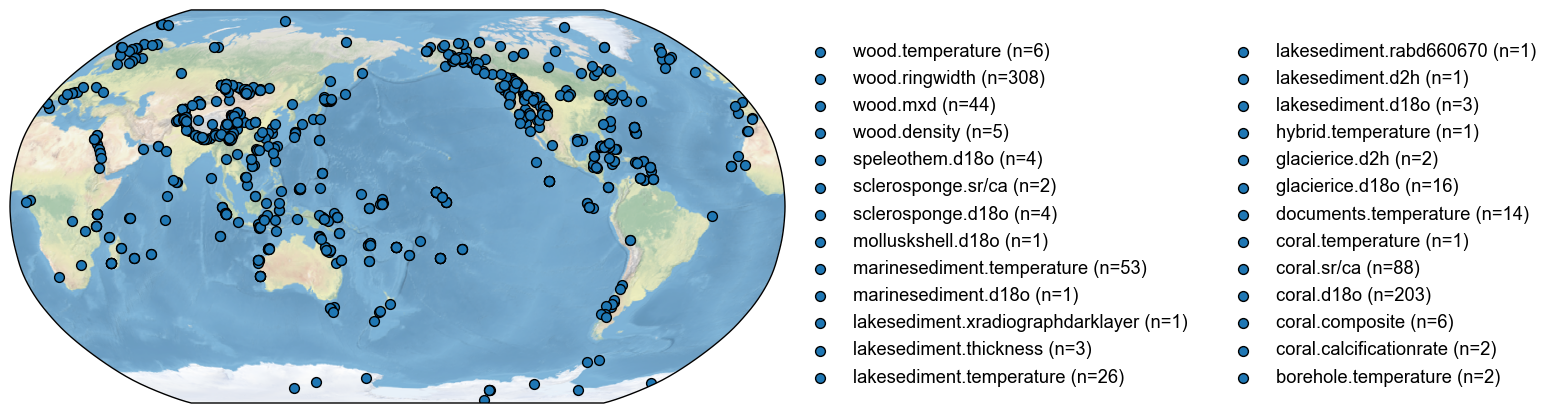

In [67]:
pdb = cfr.ProxyDatabase().from_df(df, pid_column='dataSetName', ptype_column='ptype', time_column='time_values')
fig, ax = pdb.plot()